# Demo: Mean-Error-Description-Length Calculator

In [1]:
from dysts.base import make_trajectory_ensemble
from dysts.base import get_attractor_list
import dysts.flows as flows
import dysts.datasets as datasets
import numpy as np
from dysts.analysis import sample_initial_conditions

##############################################
# import new library
from complexity_calculator import compute_medl
##############################################

## Value Check

According to the paper, $m\times v\times v/2$ gives MEDL of about 13.58. Notice that since there is no division opperation in our systems, there is no need to support the division symbol. Here, we compute the MEDL of $m\times v\times v\times2$, which should give the same result.

In [2]:
from complexity_calculator import get_expr_complexity
get_expr_complexity('m * v * v * 2')

13.5849625007212

## Prepare all 72 systems

Simplify attributes to only "parameters" to reduce unnecessary computation.

In [3]:
# experimental system list
systems_list = ["Aizawa", "Arneodo", "Bouali2", 
                "GenesioTesi", "HyperBao", "HyperCai", "HyperJha", 
                "HyperLorenz", "HyperLu", "HyperPang", "Laser",
                "Lorenz", 
                "LorenzBounded", 
                "MooreSpiegel", "Rossler", "ShimizuMorioka",
                # Added a bunch of additional polynomial systems
                "HenonHeiles", "GuckenheimerHolmes", "Halvorsen", "KawczynskiStrizhak",
                "VallisElNino", "RabinovichFabrikant", "NoseHoover", "Dadras", "RikitakeDynamo",
                "NuclearQuadrupole", "PehlivanWei", "SprottTorus", "SprottJerk", "SprottA", "SprottB",
                "SprottC", "SprottD", "SprottE", "SprottF", "SprottG", "SprottH", "SprottI", "SprottJ",
                "SprottK", "SprottL", "SprottM", "SprottN", "SprottO", "SprottP", "SprottQ", "SprottR",
                "SprottS", "Rucklidge", "Sakarya", "RayleighBenard", "Finance", "LuChenCheng",
                "LuChen", "QiChen", "ZhouChen", "BurkeShaw", "Chen", "ChenLee", "WangSun", "DequanLi",
                "NewtonLiepnik", "HyperRossler", "HyperQi", "Qi", "LorenzStenflo", "HyperYangChen", 
                "HyperYan", "HyperXu", "HyperWang", "AtmosphericRegime", "Hadley", "HindmarshRose",
               ]
alphabetical_sort = np.argsort(systems_list)
systems_list = np.array(systems_list)[alphabetical_sort]

# Get training and testing trajectories for all the experimental systems and their attributes
n = 5000
all_sols_train = dict()

# simplify attributes
attributes = ["parameters"]

all_properties = dict()

for i, equation_name in enumerate(systems_list):
    eq = getattr(flows, equation_name)()
    try:
        ic_train, ic_test = sample_initial_conditions(eq, 2, traj_length=1000, pts_per_period=30)
        eq.ic = ic_train
        t_sol, sol = eq.make_trajectory(n, method="Radau", resample=True, return_times=True, standardize=False)
        all_sols_train[equation_name] = sol
        attr_vals = [getattr(eq, item, None) for item in attributes]
        all_properties[equation_name] = dict(zip(attributes, attr_vals))
    except SystemError:
        print('Could not load one of the systems: ', equation_name)
    except TypeError:
        print('Could not load one of the systems ', equation_name)

# rearrange parameters in list
num_attractors = len(systems_list)

param_list = []

for system in systems_list:
    param_list.append(all_properties[system]['parameters'])

## Compute MEDL

One may obtain the MEDL of a list of systems using the oneline code as follows.

In [4]:
medl_list = compute_medl(systems_list, all_sols_train, param_list)

Preview the MEDL of each system.

In [5]:
for i, system in enumerate(systems_list):
    print(system, "MEDL:", medl_list[i])

Aizawa MEDL: 122.18299067736842
Arneodo MEDL: 31.019550008653873
AtmosphericRegime MEDL: 89.54887502163467
Bouali2 MEDL: 77.69207659553408
BurkeShaw MEDL: 37.34856396581859
Chen MEDL: 40.18506523353571
ChenLee MEDL: 37.150849518197795
Dadras MEDL: 52.70600608014152
DequanLi MEDL: 69.21055681077809
Finance MEDL: 43.37291214297528
GenesioTesi MEDL: 28.4345875079327
GuckenheimerHolmes MEDL: 120.50338698022776
Hadley MEDL: 73.85288120852478
Halvorsen MEDL: 101.06477719407376
HenonHeiles MEDL: 29.9315685693242
HindmarshRose MEDL: 80.54017176567734
HyperBao MEDL: 55.24558702324589
HyperCai MEDL: 65.1693962282014
HyperJha MEDL: 57.567515118133244
HyperLorenz MEDL: 57.567515118133244
HyperLu MEDL: 52.92365892835852
HyperPang MEDL: 55.19269349816422
HyperQi MEDL: 84.49793939376858
HyperRossler MEDL: 39.93156856932417
HyperWang MEDL: 54.858009173586574
HyperXu MEDL: 57.214152983811836
HyperYan MEDL: 85.750738751617
HyperYangChen MEDL: 47.62919048309068
KawczynskiStrizhak MEDL: 57.851253107868175

## Visualize the distribution of MEDL

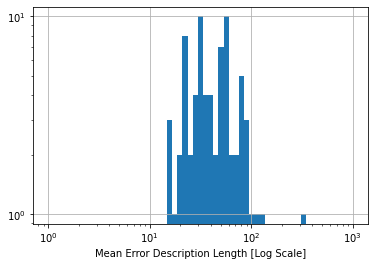

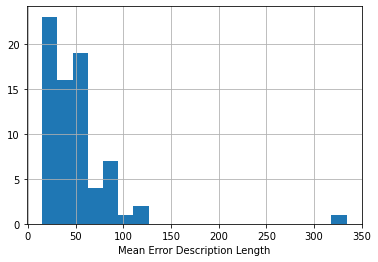

In [6]:
import matplotlib.pyplot as plt

plt.figure()
compl_levels = np.logspace(0, 3, 60)
plt.hist(medl_list, bins=compl_levels, log=True)
plt.xlabel('Mean Error Description Length [Log Scale]')
plt.xscale('log')
plt.grid(True)

plt.figure()
plt.hist(medl_list, bins=20)
plt.xlabel('Mean Error Description Length')
plt.grid(True)